# Auto insurance monthly premium prediction
# by Qianli Chen
---


## The goal is to predict auto sinsurance monthly premium by some usable features

At first I import some library tools for furture use.

In [39]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from scipy.special import inv_boxcox

# visualization 
import graphviz 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## Acquire data

We use data acquired from internet. The data type should be similar in the insurance industry. This model is using the available data to show some demo and the model can be modify and adjusted according to the available data in the future.

In [2]:
Original_df = pd.read_csv('./input/Auto_Insurance_Claims_Sample.csv')
train_df, test_df = train_test_split(Original_df, test_size=0.33, random_state=42)
#combine = [train_df, test_df]

## Analyze by describing data


**Which features are available in the dataset?**

Let's have a glance at those data types.

In [3]:
print(train_df.columns.values)

['Customer' 'Country' 'State Code' 'State' 'Claim Amount' 'Response'
 'Coverage' 'Education' 'Effective To Date' 'EmploymentStatus' 'Gender'
 'Income' 'Location Code' 'Marital Status' 'Monthly Premium Auto'
 'Months Since Last Claim' 'Months Since Policy Inception'
 'Number of Open Complaints' 'Number of Policies' 'Policy Type' 'Policy'
 'Claim Reason' 'Sales Channel' 'Total Claim Amount' 'Vehicle Class'
 'Vehicle Size']


In [4]:
# preview the data
train_df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
290,JT52858,US,IA,Iowa,902.786722,No,Premium,Bachelor,1/10/11,Employed,...,75,1,8,Personal Auto,Personal L1,Scratch/Dent,Branch,537.600000,Four-Door Car,Medsize
2236,IE84844,US,OK,Oklahoma,472.223721,No,Basic,High School or Below,2/6/11,Unemployed,...,32,0,3,Personal Auto,Personal L2,Scratch/Dent,Agent,655.489027,Four-Door Car,Medsize
6380,JV29414,US,IA,Iowa,1778.805705,No,Extended,Doctor,2/11/11,Employed,...,13,0,2,Personal Auto,Personal L3,Hail,Agent,17.558721,Four-Door Car,Medsize
3396,LY17372,US,NE,Nebraska,511.230658,No,Extended,College,2/28/11,Employed,...,55,4,1,Personal Auto,Personal L3,Collision,Branch,741.300032,SUV,Small
2118,EW86465,US,NE,Nebraska,475.962434,No,Basic,High School or Below,2/7/11,Employed,...,44,0,3,Corporate Auto,Corporate L2,Scratch/Dent,Web,404.074203,Four-Door Car,Medsize


In [5]:
train_df.tail()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5734,FX81675,US,MO,Missouri,733.432808,No,Basic,College,1/29/11,Employed,...,63,0,2,Personal Auto,Personal L3,Scratch/Dent,Agent,308.321335,Four-Door Car,Small
5191,ZU30804,US,MO,Missouri,549.894068,Yes,Basic,College,2/5/11,Medical Leave,...,64,0,3,Personal Auto,Personal L3,Collision,Branch,350.400000,Four-Door Car,Medsize
5390,LA53648,US,MO,Missouri,899.277914,No,Extended,High School or Below,1/27/11,Unemployed,...,4,0,7,Personal Auto,Personal L1,Collision,Call Center,1059.572464,SUV,Medsize
860,IS30295,US,NE,Nebraska,1463.545158,Yes,Extended,Bachelor,2/27/11,Unemployed,...,56,0,2,Personal Auto,Personal L3,Collision,Call Center,667.200000,SUV,Medsize
7270,EH69733,US,NE,Nebraska,334.963927,No,Extended,Bachelor,1/27/11,Employed,...,13,0,1,Corporate Auto,Corporate L2,Hail,Branch,344.015386,Four-Door Car,Medsize


**Mixed data types**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

- The Customer is a mixed data with both numeric and alphanumeric. 


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6119 entries, 290 to 7270
Data columns (total 26 columns):
Customer                         6119 non-null object
Country                          6119 non-null object
State Code                       6119 non-null object
State                            6119 non-null object
Claim Amount                     6119 non-null float64
Response                         6119 non-null object
Coverage                         6119 non-null object
Education                        6119 non-null object
Effective To Date                6119 non-null object
EmploymentStatus                 6119 non-null object
Gender                           6119 non-null object
Income                           6119 non-null int64
Location Code                    6119 non-null object
Marital Status                   6119 non-null object
Monthly Premium Auto             6119 non-null int64
Months Since Last Claim          6119 non-null int64
Months Since Policy Inception

## Which features are numerical?

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

In [7]:
train_df_numeric = train_df._get_numeric_data();

**The features below are numeric type values**

In [8]:
print(train_df_numeric.columns.values)

['Claim Amount' 'Income' 'Monthly Premium Auto' 'Months Since Last Claim'
 'Months Since Policy Inception' 'Number of Open Complaints'
 'Number of Policies' 'Total Claim Amount']


In [9]:
train_df.describe(percentiles=[.25, .75])
# Review distribution of data using `percentiles=[.25, .75]` to define you percentiles in view.

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000
mean,799.172898,37727.587514,93.292695,15.118320,48.021572,0.386501,2.989704,434.785343
std,668.661095,30211.519810,34.509278,10.108276,27.845835,0.926784,2.400431,293.502679
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,409.628668,10335.500000,68.000000,6.000000,24.000000,0.000000,1.000000,271.298286
50%,582.422419,34115.000000,83.000000,14.000000,48.000000,0.000000,2.000000,380.595522
75%,901.017444,62250.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,7422.851604,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Plot the histogram of data for visulization

**Also, we can visuilize the data shown below.**

The diagonal plots are histogram of our data and the off-diagonal plots are the correlation plots.

- Because we are trying an online quote cost prediction, but the given data set is for claim prediction and includes features such as claim amount, months since last claim, months since policy inception... etc. But the case of analysis, I will use data but in real applications, those data might not be available for onlone quote. This is left for furture modification acoording to future available data.

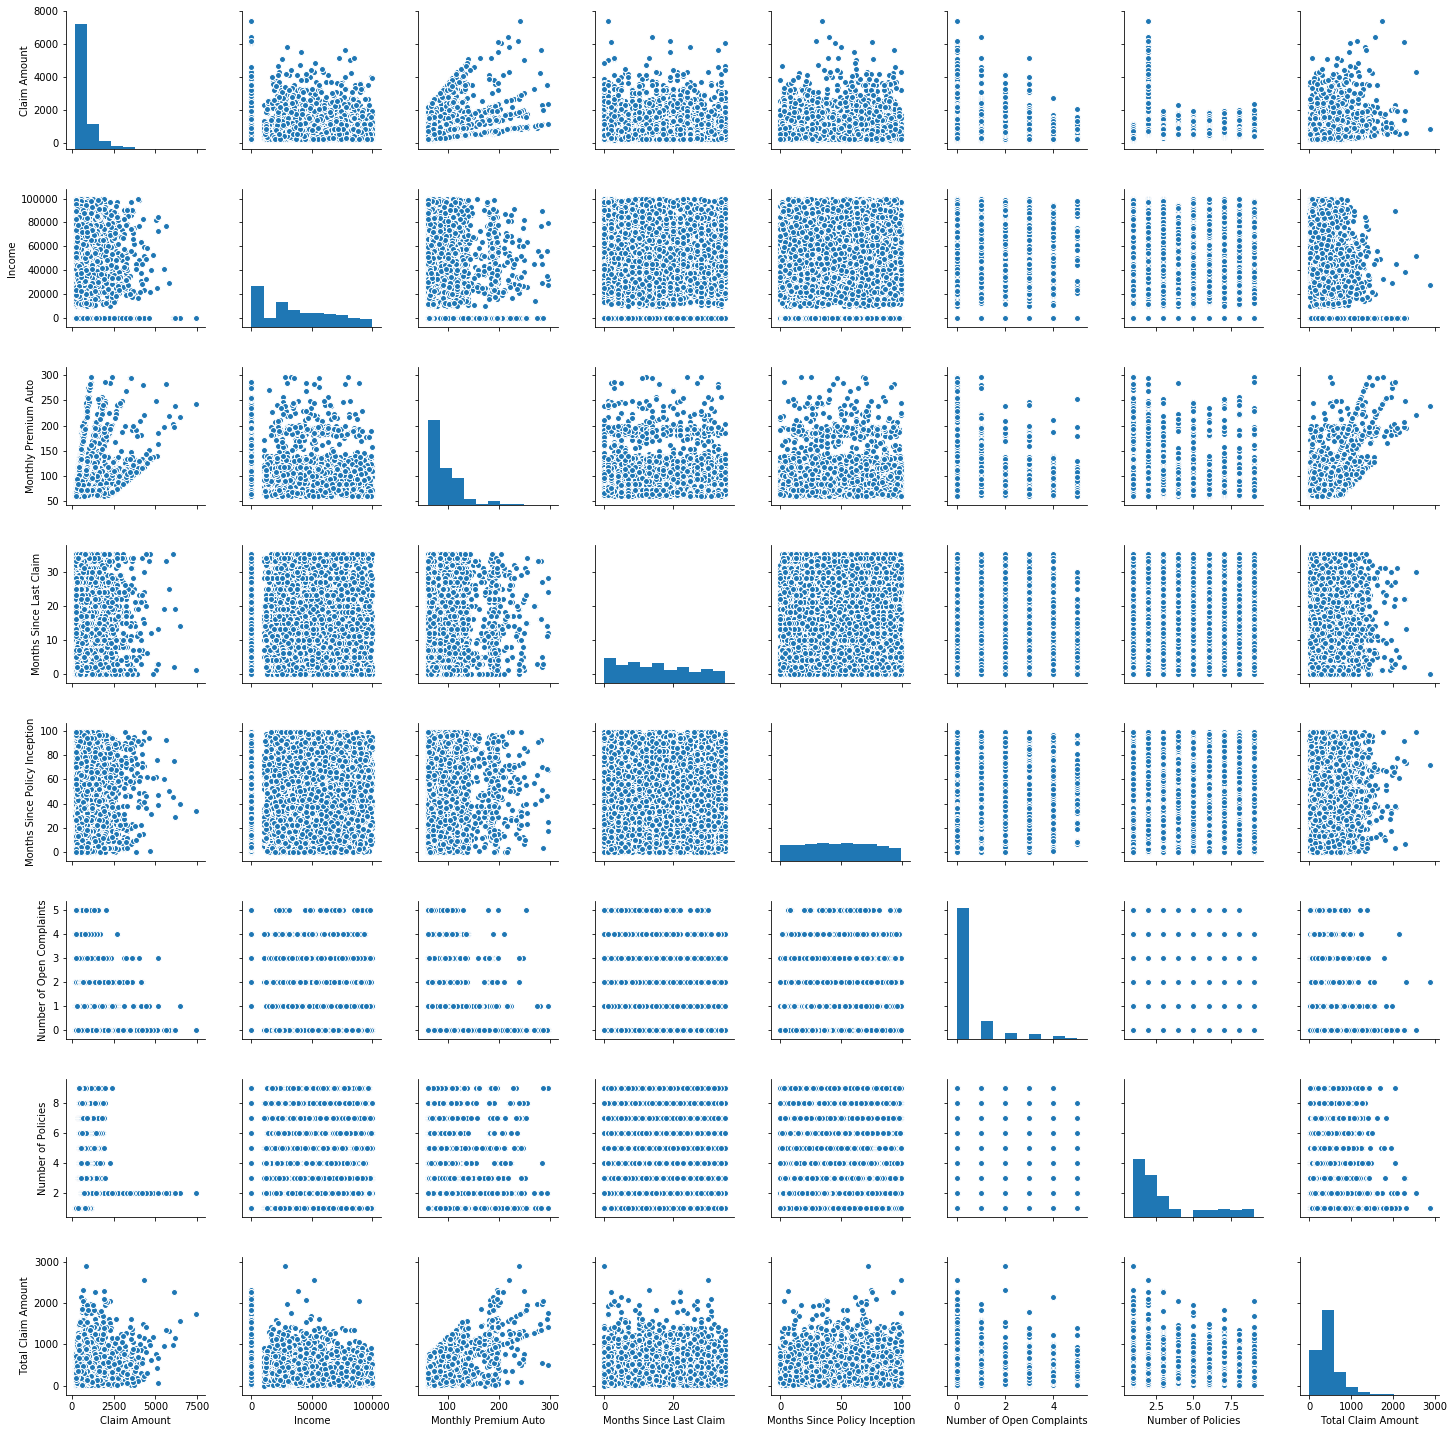

In [10]:
sns.pairplot(train_df_numeric)

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Number of total samples are 6119. 
- 75% Claim amount are below 901. However the maximum amount can be 7422.
- The income is expected, we have relatively larger numbers in the mid-level and relatively small amount for high and low. but the 0 income is an exception. 
- The months since last claim and months since policy inception is uniformly distributed which are representive.
- The number of open complaint is distributed in low value level. 90% have 0 complaint.
- Most records have 1 number of policies and the higher number of policies is, the few records are there.
- The totla claim amount is mostly located at lower level but have strong correlation with monthly premium. I will acount it as feature included.

**Decision**
- Since we are using the data for quote prediction, we should not have the information about claim amount, months since last claim, month since policy inception, number of open complaints and totoal claim amount. Although some of those data are highly related to the premium, but for our product purpose, I decide that those data will not be used.

In [11]:
train_df = train_df.drop(['Claim Amount', 'Months Since Last Claim','Months Since Policy Inception', 'Number of Open Complaints','Total Claim Amount'], axis=1)
test_df = test_df.drop(['Claim Amount', 'Months Since Last Claim','Months Since Policy Inception', 'Number of Open Complaints','Total Claim Amount'], axis=1)

## Which features are categorical

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.


In [12]:
train_df_non_numeric = train_df.select_dtypes(include=['object'])

**The features below are categorical type values**

In [13]:
print(train_df_non_numeric.columns.values)

['Customer' 'Country' 'State Code' 'State' 'Response' 'Coverage'
 'Education' 'Effective To Date' 'EmploymentStatus' 'Gender'
 'Location Code' 'Marital Status' 'Policy Type' 'Policy' 'Claim Reason'
 'Sales Channel' 'Vehicle Class' 'Vehicle Size']


**Let's look at the distribution about those categorical type values**

In [14]:
train_df.describe(include=['O'])

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
count,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119,6119
unique,6119,1,5,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,LU87443,US,MO,Missouri,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Four-Door Car,Medsize
freq,1,6119,2135,2135,5256,3732,1816,137,3833,3119,3867,3584,4551,2299,2537,2325,3073,4317


**What is the distribution of categorical features?**

- Customer are unique across the dataset (count=unique=6119).
- The country has only one value as US, I may drop this feature later as it is all the same for all record.
- The state is a repeat of state code, I will drop the state later.
- Effective to Date has most(59) unique values other than customer. I might not be very relevant to premium.
- The response is whether this claim is accepted or not. 5256/6119=86% of those cases are rejected.

**Also, we can visuilize the histogram of premium in different category shown below.**

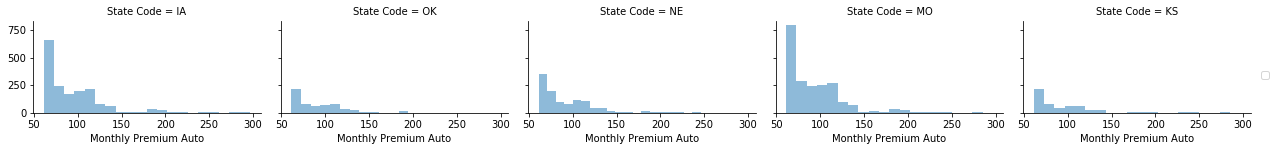

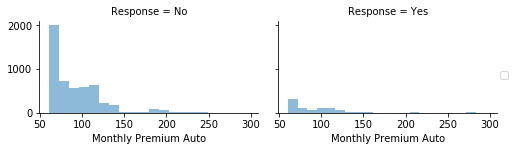

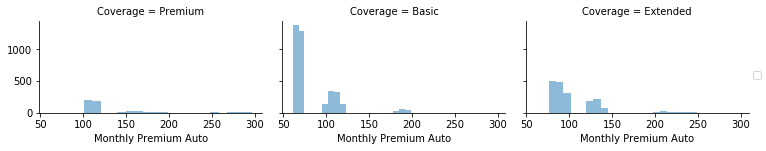

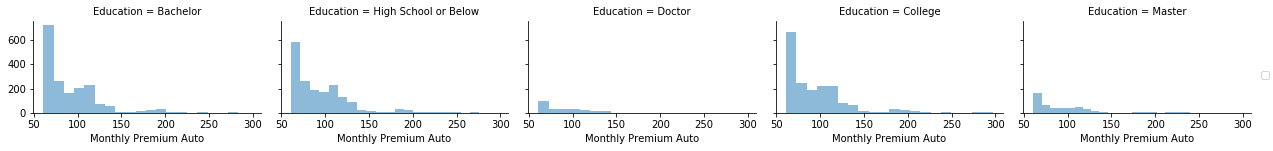

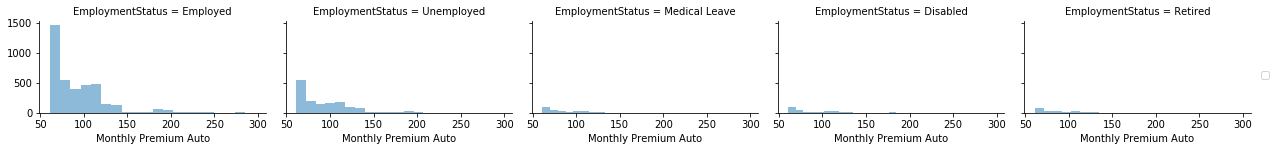

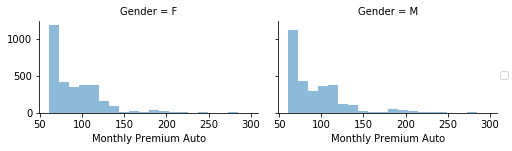

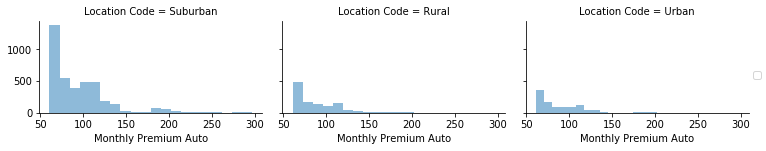

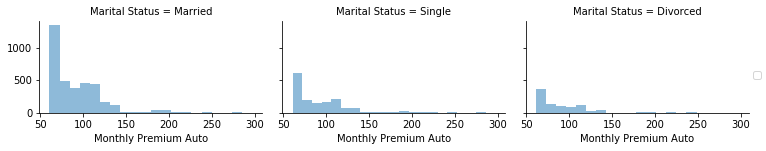

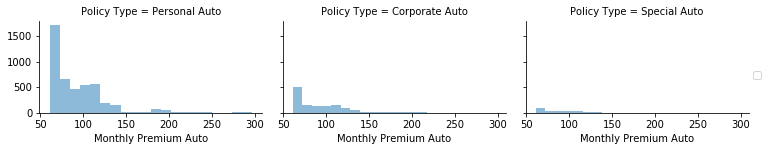

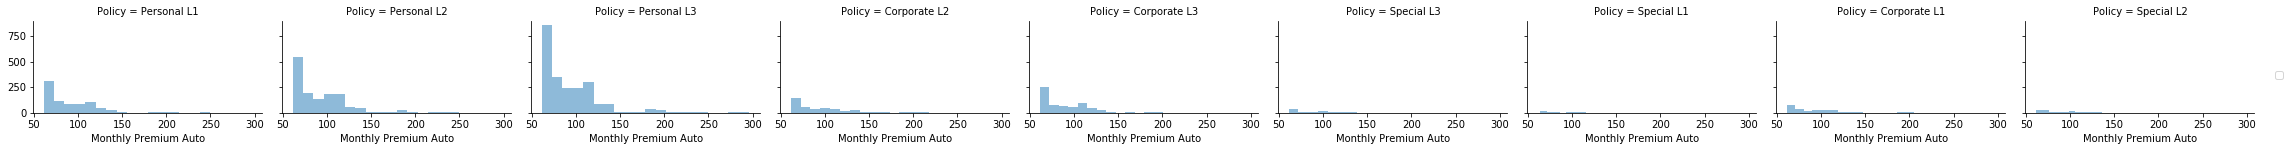

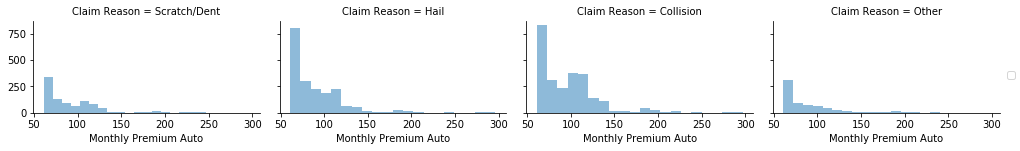

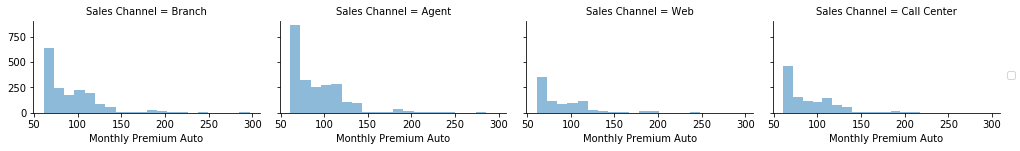

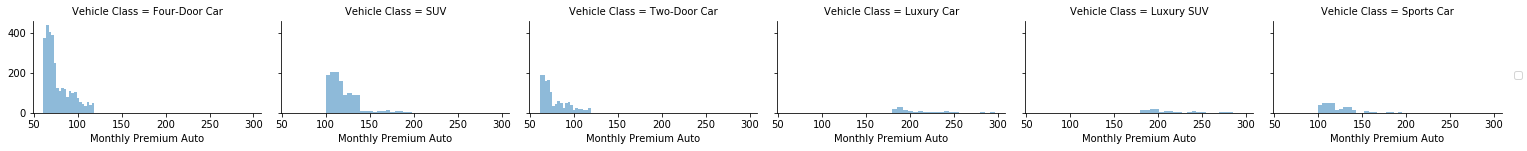

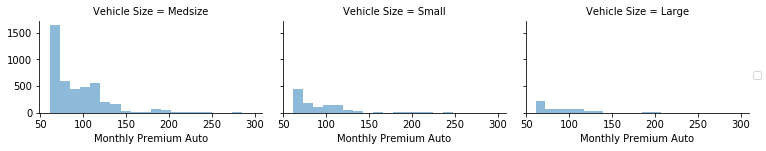

In [15]:
for feature in train_df_non_numeric.columns.values:
    if feature not in ['Customer', 'Country', 'State', 'Effective To Date']:
        grid = sns.FacetGrid(train_df, col=feature, size=2.2, aspect=1.6)
        grid.map(plt.hist, 'Monthly Premium Auto', alpha=.5, bins=20)
        grid.add_legend();

**Along with the visulization, we can see the mean and variance of premium in different category.**

In [16]:
for feature in train_df_non_numeric.columns.values:
    if feature not in ['Customer', 'Country', 'State', 'Effective To Date']:
        print ('mean')
        print (train_df[[feature, 'Monthly Premium Auto']].groupby([feature], as_index=False).mean().sort_values(by='Monthly Premium Auto', ascending=False))
        print ('variance')
        print (train_df[[feature, 'Monthly Premium Auto']].groupby([feature], as_index=False).var().sort_values(by='Monthly Premium Auto', ascending=False))      
        print ('\n')

mean
  State Code  Monthly Premium Auto
0         IA             93.723183
4         OK             93.553191
2         MO             93.391569
3         NE             92.689469
1         KS             92.446970
variance
  State Code  Monthly Premium Auto
1         KS           1323.515209
0         IA           1286.461124
2         MO           1143.239292
4         OK           1117.388559
3         NE           1113.956637


mean
  Response  Monthly Premium Auto
1      Yes             93.762457
0       No             93.215563
variance
  Response  Monthly Premium Auto
1      Yes           1271.072278
0       No           1177.922125


mean
   Coverage  Monthly Premium Auto
2   Premium            130.798903
1  Extended            104.514130
0     Basic             82.262862
variance
   Coverage  Monthly Premium Auto
2   Premium           1777.325786
1  Extended           1077.606108
0     Basic            771.518931


mean
              Education  Monthly Premium Auto
3  High Sch

**Decisions.**

- We should drop the response, claim reason features since we don't have them for online training.
- The other categorical feature should all be used.
- The categorical feature should be modified and convert through one hot encoding.

In [17]:
train_df = train_df.drop(['Customer', 'Country', 'State', 'Effective To Date', 'Response', 'Claim Reason'], axis=1)
test_df = test_df.drop(['Country', 'State', 'Effective To Date','Response', 'Claim Reason'], axis=1)

** Now we have those features left **

In [18]:
print(train_df.columns.values)

['State Code' 'Coverage' 'Education' 'EmploymentStatus' 'Gender' 'Income'
 'Location Code' 'Marital Status' 'Monthly Premium Auto'
 'Number of Policies' 'Policy Type' 'Policy' 'Sales Channel'
 'Vehicle Class' 'Vehicle Size']


In [19]:
train_df = pd.get_dummies(train_df, columns=["State Code", 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])

** We can see all categorical features has been converted to numberical features using one hot encoding. **

In [20]:
print(train_df.columns.values)

['Income' 'Monthly Premium Auto' 'Number of Policies' 'State Code_IA'
 'State Code_KS' 'State Code_MO' 'State Code_NE' 'State Code_OK'
 'Coverage_Basic' 'Coverage_Extended' 'Coverage_Premium'
 'Education_Bachelor' 'Education_College' 'Education_Doctor'
 'Education_High School or Below' 'Education_Master'
 'EmploymentStatus_Disabled' 'EmploymentStatus_Employed'
 'EmploymentStatus_Medical Leave' 'EmploymentStatus_Retired'
 'EmploymentStatus_Unemployed' 'Gender_F' 'Gender_M' 'Location Code_Rural'
 'Location Code_Suburban' 'Location Code_Urban' 'Marital Status_Divorced'
 'Marital Status_Married' 'Marital Status_Single'
 'Policy Type_Corporate Auto' 'Policy Type_Personal Auto'
 'Policy Type_Special Auto' 'Policy_Corporate L1' 'Policy_Corporate L2'
 'Policy_Corporate L3' 'Policy_Personal L1' 'Policy_Personal L2'
 'Policy_Personal L3' 'Policy_Special L1' 'Policy_Special L2'
 'Policy_Special L3' 'Sales Channel_Agent' 'Sales Channel_Branch'
 'Sales Channel_Call Center' 'Sales Channel_Web'
 'Veh

In [21]:
train_df.head()

,Income,Monthly Premium Auto,Number of Policies,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Coverage_Basic,Coverage_Extended,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
290,99002,112,8,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2236,0,65,3,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
6380,73339,89,2,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3396,44743,137,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2118,26747,61,3,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


** We do the same thing to the test data. **

In [22]:
test_df = pd.get_dummies(test_df, columns=["State Code", 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])

In [23]:
print(test_df.columns.values)

['Customer' 'Income' 'Monthly Premium Auto' 'Number of Policies'
 'State Code_IA' 'State Code_KS' 'State Code_MO' 'State Code_NE'
 'State Code_OK' 'Coverage_Basic' 'Coverage_Extended' 'Coverage_Premium'
 'Education_Bachelor' 'Education_College' 'Education_Doctor'
 'Education_High School or Below' 'Education_Master'
 'EmploymentStatus_Disabled' 'EmploymentStatus_Employed'
 'EmploymentStatus_Medical Leave' 'EmploymentStatus_Retired'
 'EmploymentStatus_Unemployed' 'Gender_F' 'Gender_M' 'Location Code_Rural'
 'Location Code_Suburban' 'Location Code_Urban' 'Marital Status_Divorced'
 'Marital Status_Married' 'Marital Status_Single'
 'Policy Type_Corporate Auto' 'Policy Type_Personal Auto'
 'Policy Type_Special Auto' 'Policy_Corporate L1' 'Policy_Corporate L2'
 'Policy_Corporate L3' 'Policy_Personal L1' 'Policy_Personal L2'
 'Policy_Personal L3' 'Policy_Special L1' 'Policy_Special L2'
 'Policy_Special L3' 'Sales Channel_Agent' 'Sales Channel_Branch'
 'Sales Channel_Call Center' 'Sales Channel

## Model, predict and solve

This is a very standard problem for regression, let's use regression first.

In [24]:
X_train = train_df.drop('Monthly Premium Auto', axis=1)
Y_train = train_df['Monthly Premium Auto']
X_test  = test_df.drop(['Customer','Monthly Premium Auto'], axis=1).copy()
Y_test = test_df['Monthly Premium Auto']
X_train.shape, Y_train.shape, X_test.shape

((6119, 53), (6119,), (3015, 53))

For linear regression, First step is to check the normality of premium data

In [25]:
Y_train_lin = Y_train.copy()

Text(0.5,1,'Probplot against normal distribution')

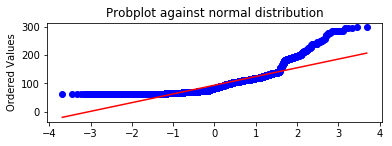

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

prob = stats.probplot(Y_train_lin, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

Text(0.5,1,'Probplot after Box-Cox transformation')

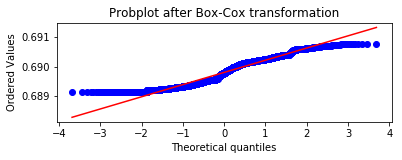

In [27]:
fig = plt.figure()
ax2 = fig.add_subplot(211)
Y_train_lin_t, lb = stats.boxcox(Y_train_lin)
prob = stats.probplot(Y_train_lin_t, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

Text(0.5,1,'Probplot after log transformation')

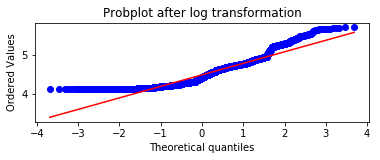

In [65]:
fig = plt.figure()
ax2 = fig.add_subplot(211)
Y_train_lin_t = Y_train_lin.apply(np.log)
prob = stats.probplot(Y_train_lin_t, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after log transformation')

In [51]:
# Regression code with box-cox transform
linreg = LinearRegression()
linreg.fit(X_train, Y_train_lin_t)
Y_pred_t = linreg.predict(X_test)
Y_pred = inv_boxcox(Y_pred_t, lb)
Y_test_t =  stats.boxcox(Y_test,lb)
acc_lin = round(linreg.score(X_test, Y_test_t) * 100, 2)
acc_lin

89.06

Compute the mean error

In [52]:
np.mean(np.absolute(Y_pred-Y_test)/Y_test)

0.09621427972274178

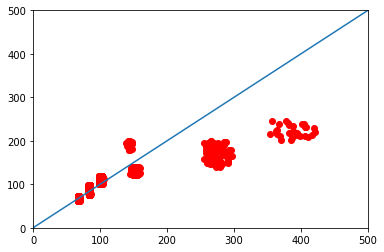

In [53]:
plt.plot(Y_pred, Y_test,'ro')
plt.axis([0, 500, 0, 500])
plt.plot([0, 500],[0, 500])
plt.show()

In [54]:
# Regression code without box-cox transform

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_lin = round(linreg.score(X_test, Y_test) * 100, 2)
acc_lin

95.88

Compute the mean error

In [55]:
np.mean(np.absolute(Y_pred-Y_test)/Y_test)

0.05502482763930674

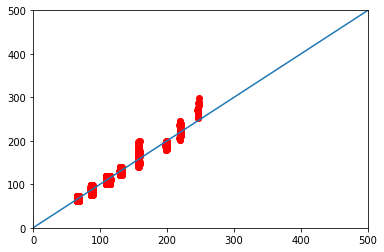

In [56]:
plt.plot(Y_pred, Y_test,'ro')
plt.axis([0, 500, 0, 500])
plt.plot([0, 500],[0, 500])
plt.show()

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [43]:
# Decision Tree

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

93.84

Compute the mean error

In [44]:
np.mean(np.absolute(Y_pred-Y_test)/Y_test)

0.06464500371734534

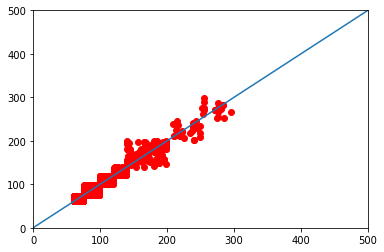

In [45]:
plt.plot(Y_pred, Y_test,'ro')
plt.axis([0, 500, 0, 500])
plt.plot([0, 500],[0, 500])
plt.show()

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [59]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

96.84

Compute the mean error

In [41]:
np.mean(np.absolute(Y_pred-Y_test)/Y_test)

0.05062004655377098

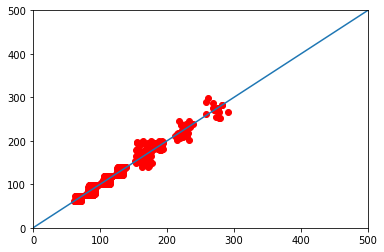

In [42]:
plt.plot(Y_pred, Y_test,'ro')
plt.axis([0, 500, 0, 500])
plt.plot([0, 500],[0, 500])
plt.show()

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [57]:
models = pd.DataFrame({
    'Model': [ 'Linear Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_lin, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,96.80
0,Linear Regression,95.88
2,Decision Tree,93.84


## Quote prediction demo

We can randomly give information and predict the monthly premium 
'State Code' 'Coverage' 'Education' 'EmploymentStatus' 'Gender' 'Income'
'Location Code' 'Marital Status' 'Monthly Premium Auto'
'Number of Policies' 'Policy Type' 'Policy' 'Sales Channel'
'Vehicle Class' 'Vehicle Size'

In [60]:
col_names =  ['State Code',
              'Coverage', 
              'Education',
              'EmploymentStatus',
              'Gender', 
              'Income',
              'Location Code',
              'Marital Status',
              'Number of Policies',
              'Policy Type', 
              'Policy', 
              'Sales Channel',
              'Vehicle Class', 
              'Vehicle Size']
my_df  = pd.DataFrame(columns = col_names)

# input your information here
my_df.loc[0] = ['MO', # choose from IA, KS, MO, NE, OK
                'Basic', # choose from Basic, Extended, Premium
                'Doctor', # choose from Bachelor, College, Doctor, High School or Below
                'Employed', # choose from Disabled, Employed, Medical Leave, Retired, Unemployed
                'M', # choose from F, M
                20000, # income
                'Urban', # choose from Rural, Suburban, Urban
                'Single', # choose from Married, Single, Divorced
                0, # number of policies
                'Personal Auto', # Corporate Auto, Personal Auto, Special Auto
                'Personal L1', # Corporate/Personal/Special L1/L2/L3
                'Agent', # Agent, Branch, Center, Web
                'Four-Door Car', # Four-Door Car, Luxury Car, Luxury SUV, SUV, Sports Car, Two-Door Car
                'Small' # Large, Medsize, Small
               ]

print(my_df.head())

my_df = pd.get_dummies(my_df, columns=["State Code", 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])

# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( my_df.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    my_df[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
my_df = my_df[X_train.columns]

Y_pred = random_forest.predict(my_df)

print('Your monthly premium is $',round(Y_pred[0],2),'.')

  State Code Coverage Education EmploymentStatus Gender Income Location Code  \
0         MO    Basic    Doctor         Employed      M  20000         Urban   

  Marital Status Number of Policies    Policy Type       Policy Sales Channel  \
0         Single                  0  Personal Auto  Personal L1         Agent   

   Vehicle Class Vehicle Size  
0  Four-Door Car        Small  
Your monthly premium is $ 66.28 .


** Have fun! **